In [173]:
import pandas as pd  
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns




## Lectura de dataset original

In [32]:

ruta_file = os.getcwd()
print("La ruta del archivo :", ruta_file)

La ruta del archivo : c:\Users\Benjamin Villacorta\Documents\Python\CursoML\Evaluacion1


In [81]:
dt=pd.read_csv(ruta_file+"/ObesityDataSet_raw_and_data_sinthetic.csv")

## Validamos estructura del DF

In [62]:
# Validamos estructura del dataframe
dt.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [63]:
dt.Height.describe()    

count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64

In [64]:
dt.Weight.describe()  

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

In [65]:
dt.Gender.value_counts()                                           

Gender
Male      1068
Female    1043
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

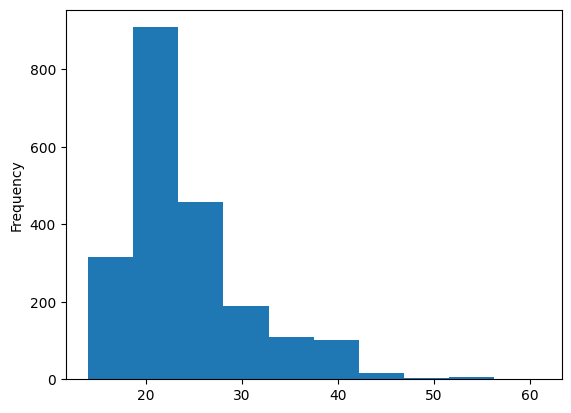

In [45]:
dt.Age.describe()
dt.Age.plot(kind="hist")   

In [40]:
dt.family_history_with_overweight.value_counts(normalize=True)


family_history_with_overweight
yes    0.817622
no     0.182378
Name: proportion, dtype: float64

## Agregue un genero mas para diversificar la data

In [82]:
dt.loc[(dt['Age'] >= 19) & (dt['Age'] <= 23), 'Gender'] = 'NB'

In [73]:
dt.Gender.describe()

count     2111
unique       3
top         NB
freq       844
Name: Gender, dtype: object

In [74]:
dt.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,NB,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,NB,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,NB,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,NB,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Limpieza de strings categoricos

In [83]:
dt["family_history_with_overweight"]=dt["family_history_with_overweight"].str.upper().str.replace("_"," ")
dt["MTRANS"]=dt["MTRANS"].str.upper().str.replace("_"," ")
dt["NObeyesdad"]=dt["NObeyesdad"].str.upper().str.replace("_"," ")

In [253]:
dt[["family_history_with_overweight","MTRANS","NObeyesdad","Weight"]].head(10)
#dt[(dt['AgeGroup'] == "70-100") & (dt['Gender'] == "NB")]
#dt.isna().any()

,family_history_with_overweight,MTRANS,NObeyesdad,Weight
0,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,64.0
1,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,56.0
2,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,77.0
3,NO,WALKING,OVERWEIGHT LEVEL I,87.0
4,NO,PUBLIC TRANSPORTATION,OVERWEIGHT LEVEL II,89.8
5,NO,AUTOMOBILE,NORMAL WEIGHT,53.0
6,YES,MOTORBIKE,NORMAL WEIGHT,55.0
7,NO,PUBLIC TRANSPORTATION,NORMAL WEIGHT,53.0
8,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,64.0
9,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,68.0


# Creo rangos de edad para realizar agrupaciones

In [257]:
# Defino bins para las edades 
bins = [0, 18, 30, 50,70,100]
labels = ['0-18', '19-30', '31-50', '51-69','70-100']
dt['AgeGroup'] = pd.cut(dt['Age'], bins=bins, labels=labels, right=False)
# Creo una clasificacion para hacer una grupo mas pequeño de tipos de sobrepeso
clasificaciones = {
    'NORMAL WEIGHT':'PESO NORMAL',
    'INSUFFICIENT WEIGHT': 'PESO INSUFICIENTE',
    'OBESITY TYPE I': 'OBESIDAD',
    'OBESITY TYPE II': 'OBESIDAD',
    'OBESITY TYPE III': 'OBESIDAD',
    'OVERWEIGHT LEVEL I': 'SOBREPESO',
    'OVERWEIGHT LEVEL II': 'SOBREPESO'
}

# Aplica clasificacion
dt["TipoPeso"] = dt['NObeyesdad'].map(clasificaciones).fillna(dt['NObeyesdad'])


dt_ag= dt.groupby(["family_history_with_overweight", "Gender", "AgeGroup", "TipoPeso"]).agg(
    promedio_Weight=("Weight", "mean"),
    cantidad_registros=("Weight", "size")
).reset_index()

dt_ag[['promedio_Weight', 'cantidad_registros']] = dt_ag[['promedio_Weight', 'cantidad_registros']].fillna(0)


C:\Users\Benjamin Villacorta\AppData\Local\Temp\ipykernel_11752\1683890302.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt_ag= dt.groupby(["family_history_with_overweight", "Gender", "AgeGroup", "TipoPeso"]).agg(


In [258]:
dt_ag

,family_history_with_overweight,Gender,AgeGroup,TipoPeso,promedio_Weight,cantidad_registros
0,NO,Female,0-18,OBESIDAD,0.000000,0
1,NO,Female,0-18,PESO INSUFICIENTE,47.712783,14
2,NO,Female,0-18,PESO NORMAL,54.500000,10
3,NO,Female,0-18,SOBREPESO,57.326853,5
4,NO,Female,19-30,OBESIDAD,85.500000,2
...,...,...,...,...,...,...
115,YES,NB,51-69,SOBREPESO,0.000000,0
116,YES,NB,70-100,OBESIDAD,0.000000,0
117,YES,NB,70-100,PESO INSUFICIENTE,0.000000,0
118,YES,NB,70-100,PESO NORMAL,0.000000,0


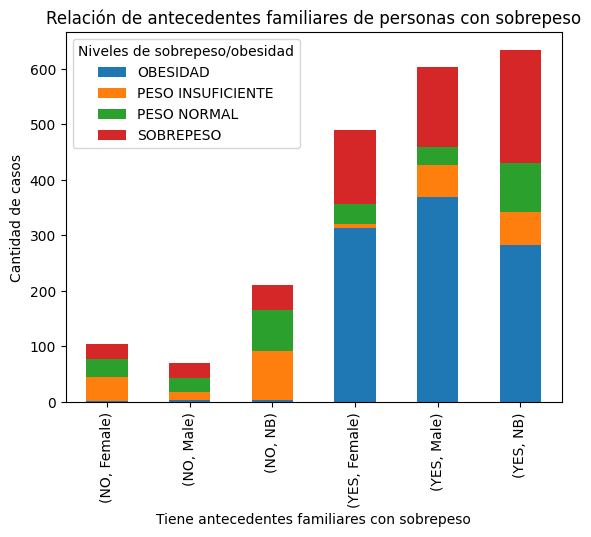

In [261]:
pivot_df = dt_ag.pivot_table(index=['family_history_with_overweight', 'Gender'], 
                             columns='TipoPeso', 
                             values='cantidad_registros', 
                             aggfunc='sum').fillna(0)

# Crear el gráfico de barras apiladas
pivot_df.plot(kind='bar', stacked=True)

# Etiquetas y título
plt.xlabel('Tiene antecedentes familiares con sobrepeso')
plt.ylabel('Cantidad de casos')
plt.title('Relación de antecedentes familiares de personas con sobrepeso')
plt.legend(title='Niveles de sobrepeso/obesidad')
plt.show()

### Dado el resultado anterior podemos determinar que existe una estrecha relacion donde una gran cantidad de personas sobre peso tiene antecedentes familiares

In [268]:
# agrupo clasificacion y los asigno a un nuevo dataframe
dt_ag2 = dt_ag.groupby('TipoPeso')['cantidad_registros'].sum().reset_index()
# Agrupo por clasificiacion y genero
dt_ag3 = dt_ag.groupby(['TipoPeso','Gender','AgeGroup'])['cantidad_registros'].sum().reset_index()
#prom_GenderTipoP=dt_ag.groupby(['TipoPeso','Gender'])['promedio_Weight'].sum().reset_index()
#prom_GenderTipoPAge=dt_ag.groupby(['TipoPeso','Gender','AgeGroup'])['promedio_Weight'].sum().reset_index()

C:\Users\Benjamin Villacorta\AppData\Local\Temp\ipykernel_11752\1390425517.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt_ag3 = dt_ag.groupby(['TipoPeso','Gender','AgeGroup'])['cantidad_registros'].sum().reset_index()
C:\Users\Benjamin Villacorta\AppData\Local\Temp\ipykernel_11752\1390425517.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prom_GenderTipoPAge=dt_ag.groupby(['TipoPeso','Gender','AgeGroup'])['promedio_Weight'].sum().reset_index()


In [263]:
dt_ag2

,TipoPeso,cantidad_registros
0,OBESIDAD,972
1,PESO INSUFICIENTE,272
2,PESO NORMAL,287
3,SOBREPESO,580


In [264]:
dt_ag3

,TipoPeso,Gender,AgeGroup,cantidad_registros
0,OBESIDAD,Female,0-18,3
1,OBESIDAD,Female,19-30,255
2,OBESIDAD,Female,31-50,56
3,OBESIDAD,Female,51-69,1
4,OBESIDAD,Female,70-100,0
5,OBESIDAD,Male,0-18,5
6,OBESIDAD,Male,19-30,225
7,OBESIDAD,Male,31-50,142
8,OBESIDAD,Male,51-69,0
9,OBESIDAD,Male,70-100,0


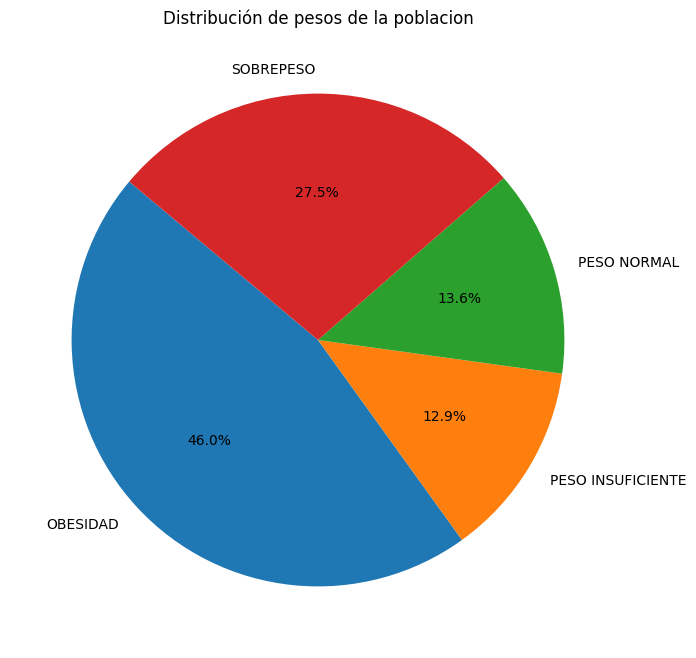

In [265]:
plt.figure(figsize=(8, 8))
plt.pie(dt_ag2['cantidad_registros'], labels=dt_ag2['TipoPeso'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de pesos de la poblacion')
plt.show()

### Acá se puede notar claramente que el segmento mayoritario son las personas con problemas de obesidad Y que el peso normal tiene distribución cercana al pesos insuficiente, esto quiere decir que gran parte del dataset mas 75%, son personas con problemas de salud alimentaria

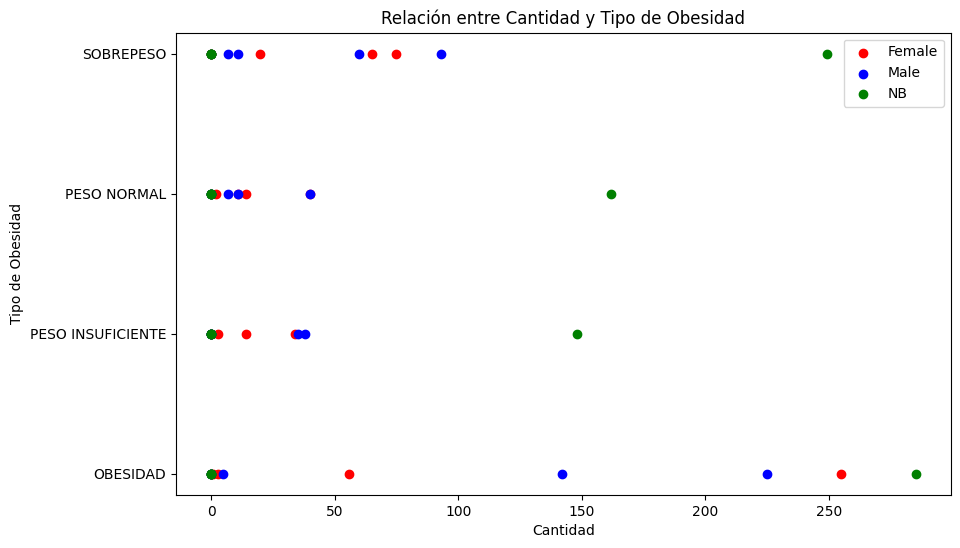

In [266]:
colors = {'Female':'red', 'Male':'blue', 'NB':'green'}
plt.figure(figsize=(10, 6))
for gender in dt_ag3['Gender'].unique():
    subset = dt_ag3[dt_ag3['Gender'] == gender]
    plt.scatter(subset['cantidad_registros'], subset['TipoPeso'], c=colors[gender], label=gender)
plt.title('Relación entre Cantidad y Tipo de Obesidad')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Obesidad')
plt.legend()
plt.show()

### De  la siguiente visualizacion me quedan claro dos 2 cosas: En la poblacion femenina hay un tasa alta de peso insuficiente y la poblacion masculina tiene una tasa alta de obesidad mientras que la poblacion no binaria tiene una tasa alta de sobre peso

C:\Users\Benjamin Villacorta\AppData\Local\Temp\ipykernel_11752\174155905.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt_ag3.groupby(['AgeGroup', 'TipoPeso', 'Gender']).sum()['cantidad_registros'].unstack().plot(kind='bar', ax=ax)


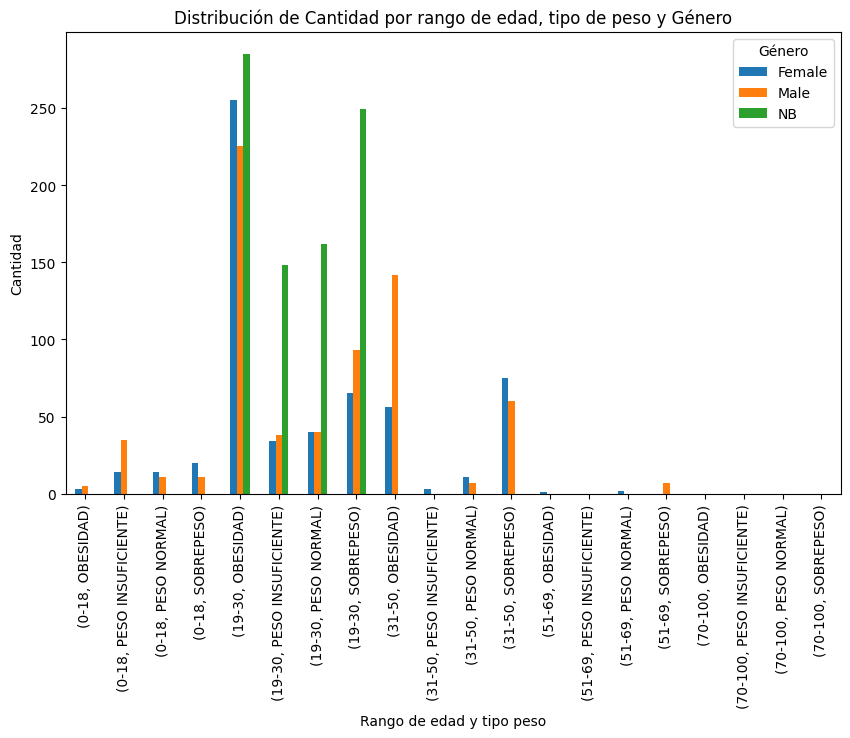

In [267]:
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de barras agrupadas
dt_ag3.groupby(['AgeGroup', 'TipoPeso', 'Gender']).sum()['cantidad_registros'].unstack().plot(kind='bar', ax=ax)

# Añadir etiquetas y título
ax.set_xlabel('Rango de edad y tipo peso')
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de Cantidad por rango de edad, tipo de peso y Género')

# Mostrar la leyenda
ax.legend(title='Género')

# Mostrar el gráfico
plt.show()

### Se creo la clasificiacion rango edad - tipo de pesos y se busca analizar la distribución entre los generos

C:\Users\Benjamin Villacorta\AppData\Local\Temp\ipykernel_11752\4110825223.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt_ag.groupby(['AgeGroup', 'TipoPeso', 'Gender']).sum()['promedio_Weight'].unstack().plot(kind='bar', ax=ax)


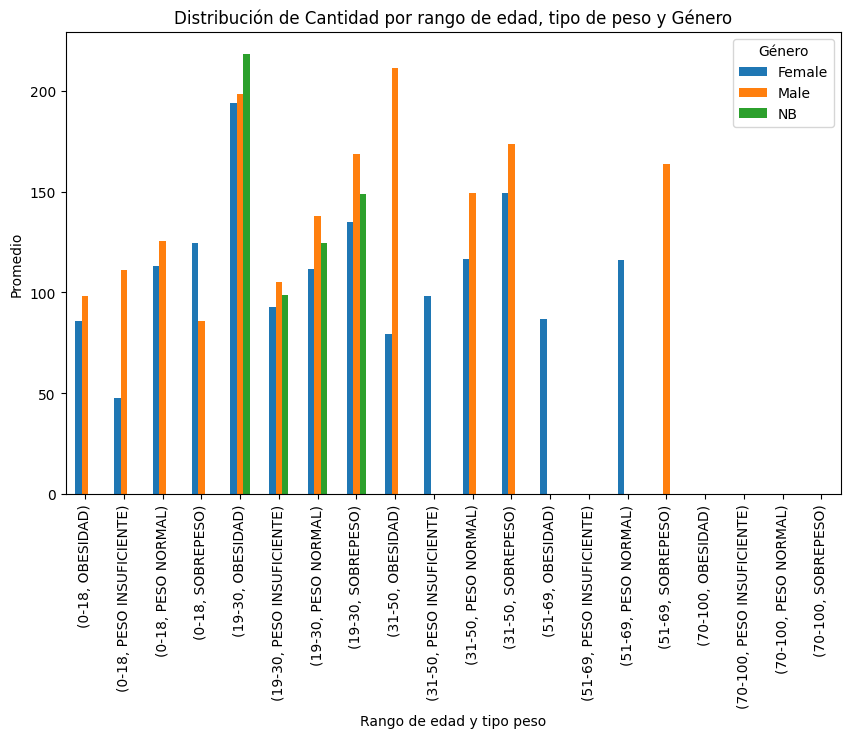

In [273]:
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de barras agrupadas
dt_ag.groupby(['AgeGroup', 'TipoPeso', 'Gender']).sum()['promedio_Weight'].unstack().plot(kind='bar', ax=ax)

# Añadir etiquetas y título
ax.set_xlabel('Rango de edad y tipo peso')
ax.set_ylabel('Promedio')
ax.set_title('Distribución de Cantidad por rango de edad, tipo de peso y Género')

# Mostrar la leyenda
ax.legend(title='Género')

# Mostrar el gráfico
plt.show()

### Vista de promedio de los tipos de pesos por rango de edad y apilado por genero